<a href="https://colab.research.google.com/github/shahchayan9/Clustering/blob/main/Anomaly_Detection_pyOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install PyOD and necessary libraries
!pip install pyod -q
!pip install matplotlib -q
!pip install numpy -q
!pip install pandas -q



In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyod.models.iforest import IForest  # Isolation Forest for anomaly detection
from pyod.models.pca import PCA  # Principal Component Analysis for anomaly detection
from pyod.utils.data import generate_data  # Utility to generate synthetic data
from pyod.utils.data import evaluate_print  # Utility to evaluate model performance


In [ ]:
# Step 1: Generate a synthetic dataset
X_train, X_test, y_train, y_test = generate_data(
    n_train=200, n_test=100, n_features=2, contamination=0.1, random_state=42
)


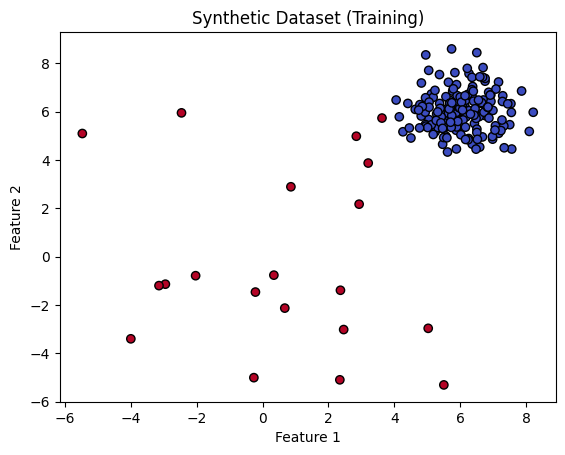

In [ ]:
# Step 2: Visualize the dataset
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="coolwarm", edgecolor="k")
plt.title("Synthetic Dataset (Training)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
# Step 3: Train an anomaly detection model (e.g., Isolation Forest)
model = IForest(random_state=42)
model.fit(X_train)


IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=42,
    verbose=0)

In [ ]:
# Step 4: Predict anomalies on test data
y_test_pred = model.predict(X_test)  # 0: inliers, 1: outliers

In [ ]:
# Step 5: Evaluate model performance
evaluate_print("Isolation Forest", y_test, y_test_pred)

Isolation Forest ROC:0.95, precision @ rank n:1.0


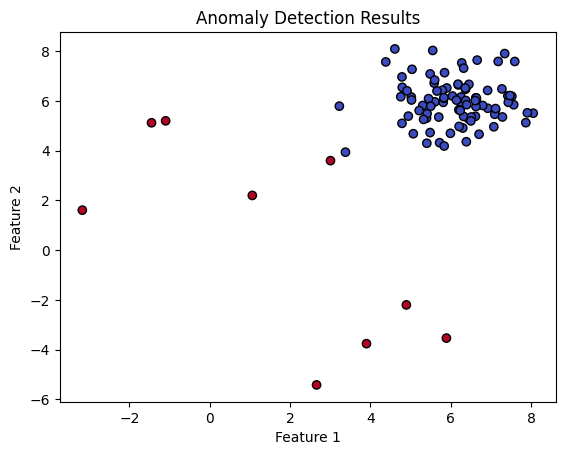

In [ ]:
# Step 6: Visualize test results
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_pred, cmap="coolwarm", edgecolor="k")
plt.title("Anomaly Detection Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


PCA Model ROC:0.9389, precision @ rank n:0.0


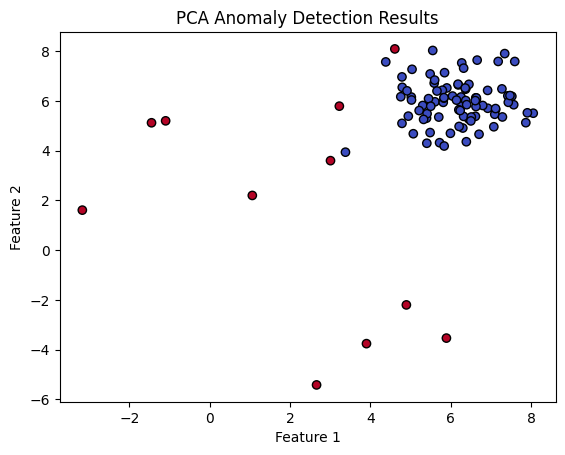

In [ ]:
# Step 7: Alternative: Use PCA for Anomaly Detection
pca_model = PCA(contamination=0.1)
pca_model.fit(X_train)

# Predict using PCA
y_pca_pred = pca_model.predict(X_test)

# Evaluate PCA results
evaluate_print("PCA Model", y_test, y_pca_pred)

# Visualize PCA results
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pca_pred, cmap="coolwarm", edgecolor="k")
plt.title("PCA Anomaly Detection Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
